**Exercise 2**

Population Analysis

In [1]:
import pandas as pd
import sqlite3

with sqlite3.connect("hw1-population.db") as db:
    data = pd.read_sql_query("SELECT * FROM population", db)

Examining data

In [2]:
data.head()

,name,age,weight,eyecolor
0,Edna Phelps,88.895690,67.122450,brown
1,Cara Yasso,9.274597,29.251244,brown
2,Gail Rave,18.345613,55.347903,brown
3,Richard Adams,16.367545,70.352184,brown
4,Krista Slater,49.971604,70.563859,brown


What columns does it have?

In [3]:
column_names = list(data.columns.values)
print(column_names)

['name', 'age', 'weight', 'eyecolor']


How many rows does it have?

In [4]:
data.shape[0]

152361

Examine the distribution of the ages in the dataset. <br>
Mean, standard deviation, minimum, maximum plus other percentiles displayed.

In [5]:
age = data.iloc[:,1]

age.describe()

count    152361.000000
mean         39.510528
std          24.152760
min           0.000748
25%          19.296458
50%          38.468955
75%          57.623245
max          99.991547
Name: age, dtype: float64

Histogram of the age distribution. <br>

Number of bins chosen is 20. <br>
The range of ages in the dataset is ~0 to ~100 years. Thus, the width of each bin is about 5 years. <br>
The relatively high bin count also gives us better resolution in the histogram. 

Bin count is inversely proportional to bin width. 

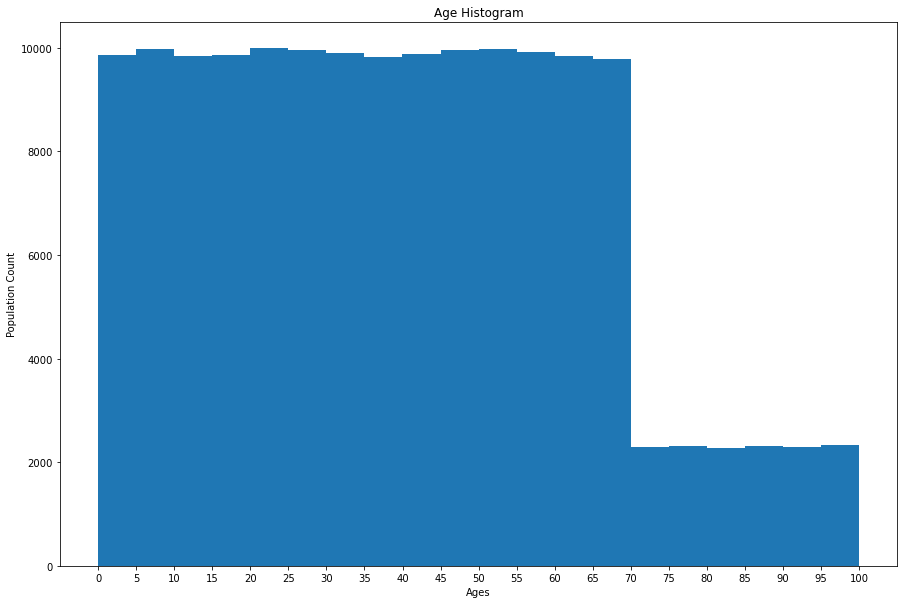

In [6]:
import matplotlib.pyplot as plt
import numpy as np 

plt.figure(figsize=(15,10))
age_hist = plt.hist(age, bins = 20)

plt.title('Age Histogram')
plt.xlabel('Ages')
plt.ylabel('Population Count')
plt.xticks(np.arange(0, 105, 5))
plt.show()

Comment on any outliers or patterns you notice in the distribution of ages. <br>
A majority of the participants were younger than 70 years.

Examine the distribution of the weights in the dataset. <br>
Mean, standard deviation, minimum, maximum plus other percentiles displayed.

In [7]:
weight = data.iloc[:,2]

weight.describe()

count    152361.000000
mean         60.884134
std          18.411824
min           3.382084
25%          58.300135
50%          68.000000
75%          71.529860
max         100.435793
Name: weight, dtype: float64

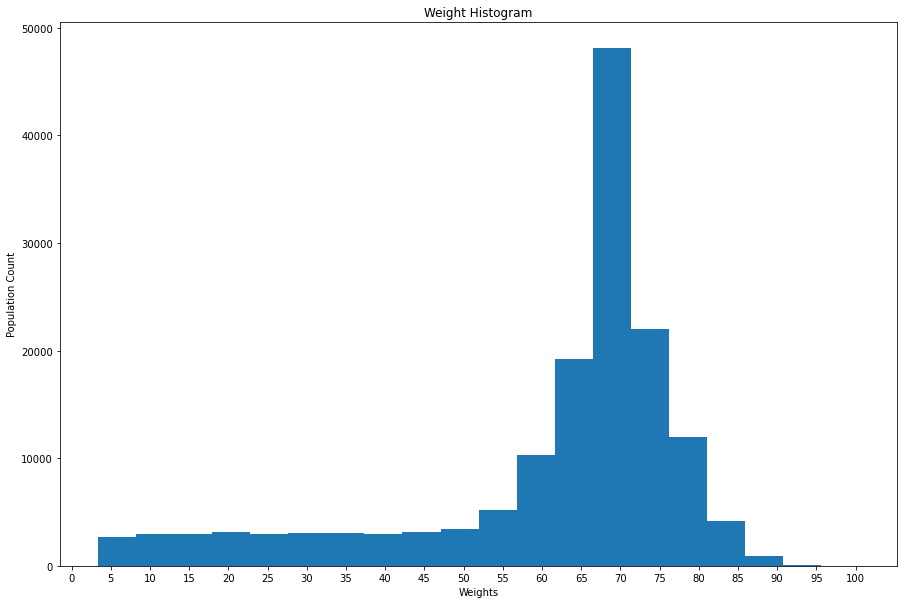

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
weight_hist = plt.hist(weight, bins = 20)

plt.title('Weight Histogram')
plt.xlabel('Weights')
plt.ylabel('Population Count')
plt.xticks(np.arange(0, 105, 5))
plt.show()

Make a scatterplot of the weights vs the ages. 

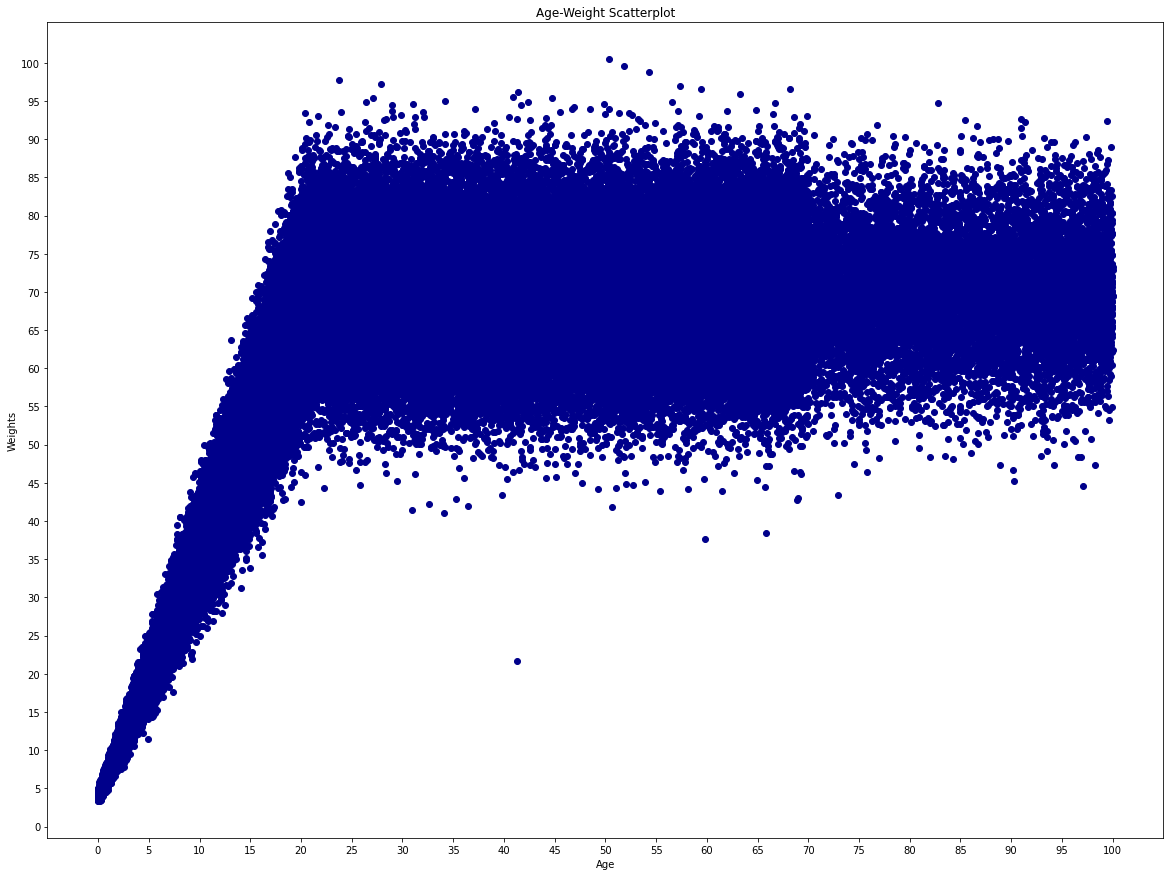

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.scatter(age, weight, c='DarkBlue')
plt.title('Age-Weight Scatterplot')
plt.xlabel('Age')
plt.ylabel('Weights')
plt.xticks(np.arange(0, 105, 5))
plt.yticks(np.arange(0, 105, 5))
plt.show()

The relationship between weight and age is approximately increasing linearly uptil the age of about 20. <br>
This makes sense as growing children will have increasing weight with increasing age. <br>

After the age of approximately 20, the weight remains non-increasingly linear with age around a mean weight of 70. <br>  

You should notice at least one outlier that does not follow the general relationship. What is the name of the person? 

In [10]:
data[(data['age'] > 25) & (data['weight'] < 35)].name.squeeze()

'Anthony Freeman'

Be sure to explain your process for identifying the person whose values don't follow the usual relationship in the readme.

Visually, the outlier is apparent in the scatter plot between age and weight. <br>
The outlier was picked up by filtering for age values that are more than 25 and weight values that are less than 35.